## Part 2: Structure Learning with ```bnstruct```

In this notebook we **construct Bayesian Network structures** from the **Ruiz** (Ruiz), **Asia**, and **Child** test datasets using the **bnstruct** package in R. We emulate the **K2** algorithm via a **Hill-Climbing** search with a fixed node ordering and a maximum fan-in.

---

### 1. Problem Formalisation

Given a database $D$ of $N$ cases over variables $X = \{X_1,\dots,X_n\}$, we seek a Directed Acyclic Graph (DAG) $\mathcal{G}$ that maximises a score function:
$$
\mathcal{G}^* = \arg\max_{\mathcal{G}\in\mathrm{DAGs}}\mathrm{Score}(\mathcal{G}\mid D).
$$

- **Nodes**: represent random variables.  
- **Edges**: encode conditional dependencies.  
- **Score**: is used to choose the set of parent nodes belonging to each node.

The **K2 algorithm** (Cooper & Herskovits, 1992) is a greedy search that:
1. Requires a **total order** of variables.
2. Iteratively adds parents (from earlier in the order) that improve the score, up to a **max fan-in** (maximum number of parents).

In **bnstruct**, we emulate K2 by calling:
```r
learn.network(..., algo="hc", layering=order, max.fanin=K)

---
### 2. The ´bnstruct´ package
The ´bnstruct´ package is built to generate network structures starting from structured datasets, providing search methods that assign the dataset the network structure that maximizes the scoring function. 

In the package one can define ``` BN-class ``` obejcts, whichis used to construct networks from datasets. Datasets need first to be compiled as `BNDataset-class` objects if not already included in the package. The **Asia** and **Child** datasets can indeed be loaded as `BNDataset` objects directly.

The ´learn.network´method learns the structure of a `BN` object given a `BNDataset`. We use the Max-Min Hill-Climbing (`mmhc`) heuristic search method algorithm and the `BDeu` (Bayesian Dirichlet equivalent uniform) scoring function in order to emulate the K2 algorithm implemented in the previous analysis. The ´layering´ parameter is used to set the variables order for the search. In a K2‐style search, for each node $X_i$ one only consider parents among those $X_j$ with index earlier in your layering:
$$
\pi(X_i)\;\subseteq\;\{\,X_j : \text{position}(j)<\text{position}(i)\}\,.
$$
Ordering should place strongly‐dependent variables before their children.

In [1]:
source("bnstruct_objects.R")

Bioconductor version '3.20' requires R version '4.4'; use `version = '3.18'`
  with R version 4.3; see https://bioconductor.org/install

Bioconductor version '3.20' is out-of-date; the current release version '3.21'
  is available with R version '4.5'; see https://bioconductor.org/install


Caricamento pacchetto: 'BiocGenerics'


I seguenti oggetti sono mascherati da 'package:stats':

    IQR, mad, sd, var, xtabs


I seguenti oggetti sono mascherati da 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Caricamento pacchetto: 'igraph'


I seguenti oggetti sono mascherati da 'package:graph':

    degree, edges, intersection, u

PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...
PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...
PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


bnstruct :: performing imputation ...

bnstruct :: imputation finished.



PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


Rows: 10000 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (11): Akt, Erk, Jnk, Mek, P38, PIP2, PIP3, PKA, PKC, Plcg, Raf

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



### The `BNDataset` Objects

In [2]:
#### RUIZ ####
ruiz.bnd <- ruiz_data
ruiz.bnd


Dataset: 

num.variables 3

variables
x1 x2 x3
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
num.items
10
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [3]:
##### ASIA ####
asia.bnd <- asia_bs
asia.bnd


Dataset: 

num.variables 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [4]:
############ CHILD ############
child.bnd <- child_bs
child.bnd


Dataset: 

num.variables 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2
num.items
5000
imputation
TRUE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

In [5]:
sachs.bnd <- sachs_data
sachs.bnd


Dataset: 

num.variables 11

variables
PKC Plcg PKA PIP3 Raf Jnk P38 PIP2 Mek Erk Akt
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
3 3 3 3 3 3 3 3 3 3 3
num.items
10000
imputation
FALSE
has.boots
FALSE
has.imputed.boots
FALSE
num.boots
0

### Network Learning

In [6]:
ruiz.bns <- learn.network(
  ruiz.bnd,
  algo = "mmhc",
  scoring.func = "BDeu",
  layering = node_order,
  max.parents = num.variables(ruiz.bnd)-1
)
ruiz.bns.no.order <- learn.network(
  ruiz.bnd,
  max.parents = num.variables(ruiz.bnd)-1
)
ruiz.bns

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 3

variables
x1 x2 x3
discreteness
TRUE TRUE TRUE
node.sizes
2 2 2
Adjacency matrix:
   x1 x2 x3
x1  0  0  0
x2  1  0  0
x3  0  1  0

Conditional probability tables:$x1
   x1
x2          1         2
  1 0.7727273 0.2272727
  2 0.2272727 0.7727273

$x2
   x2
x3          1          2
  1 0.9444444 0.05555556
  2 0.1923077 0.80769231

$x3
x3
        1         2 
0.4090909 0.5909091 



In [7]:
asia.net.bs <- learn.network(
  asia.bnd,
  algo = "mmhc",
  scoring.func = "BDeu",
  layering = asia_order,
  max.parents = num.variables(asia.bnd)-1
)
asia.net.bs

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 8

variables
Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 2 2 2 2 2 2 2
Adjacency matrix:
             Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
Asia            0            1     1          0          0      0     0       0
Tubercolosys    0            0     0          0          0      1     0       0
Smoke           0            0     0          0          0      0     0       1
LungCancer      0            0     0          0          1      0     0       0
Bronchitis      0            0     0          0          0      1     0       0
Either          0            0     0          0          0      0     0       0
X-ray           0            0     0          0          0      0     0       1
Dyspnea         0            0     0          0          0      0     0       0

Conditional probability tables:$Asia
Asia
        1         2

In [8]:
child.bns <- learn.network(
  child.bnd,
  algo = "mmhc",
  scoring.func = "BDeu",
  layering = child_order,
  max.parents = num.variables(child.bnd)-1,
  use.imputed.data = TRUE
)
child.bns

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 20

variables
BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench LungFlow Sick HypDistrib HypoxiaInO2 CO2 ChestXray Grunting LVHReport LowerBodyO2 RUQO2 CO2Report XrayReport GruntingReport
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2
Adjacency matrix:
               BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       0   0   0        0             0           0
Disease                    1       0   1   1        1             1           0
Age                        0       0   0   0        0             0           0
LVH                        0       0   0   0        0             0           0
DuctFlow                   0       0   0   0        0             0           0
CardiacMixing              0       0   0   0        0             0           0
LungParench    

In [9]:
sachs.bns <- learn.network(
    sachs.bnd,
    algo="mmhc",
    scoring.func="BDeu",
    layering=sachs_order,
    max.parents=num.variables(sachs.bnd)-1,
)
sachs.bns

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.




Bayesian Network: BNDataset

num.nodes 11

variables
PKC Plcg PKA PIP3 Raf Jnk P38 PIP2 Mek Erk Akt
discreteness
TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
node.sizes
3 3 3 3 3 3 3 3 3 3 3
Adjacency matrix:
     PKC Plcg PKA PIP3 Raf Jnk P38 PIP2 Mek Erk Akt
PKC    0    0   0    0   0   1   1    0   0   0   0
Plcg   0    0   0    1   0   0   0    1   0   0   0
PKA    1    0   0    0   0   1   1    0   0   1   1
PIP3   0    0   0    0   0   0   0    1   0   0   0
Raf    1    0   1    0   0   0   0    0   0   0   0
Jnk    0    0   0    0   0   0   0    0   0   0   0
P38    0    0   0    0   0   0   0    0   0   0   0
PIP2   0    0   0    0   0   0   0    0   0   0   0
Mek    1    0   1    0   1   0   0    0   0   1   0
Erk    0    0   0    0   0   0   0    0   0   0   1
Akt    0    0   0    0   0   0   0    0   0   0   0

Conditional probability tables:$PKC
, , Mek = 1, PKC = 1

   Raf
PKA         1         2         3
  1 0.4371666 0.8173181 0.8263612
  2 0.1879870 0.269174

### DAG Plots

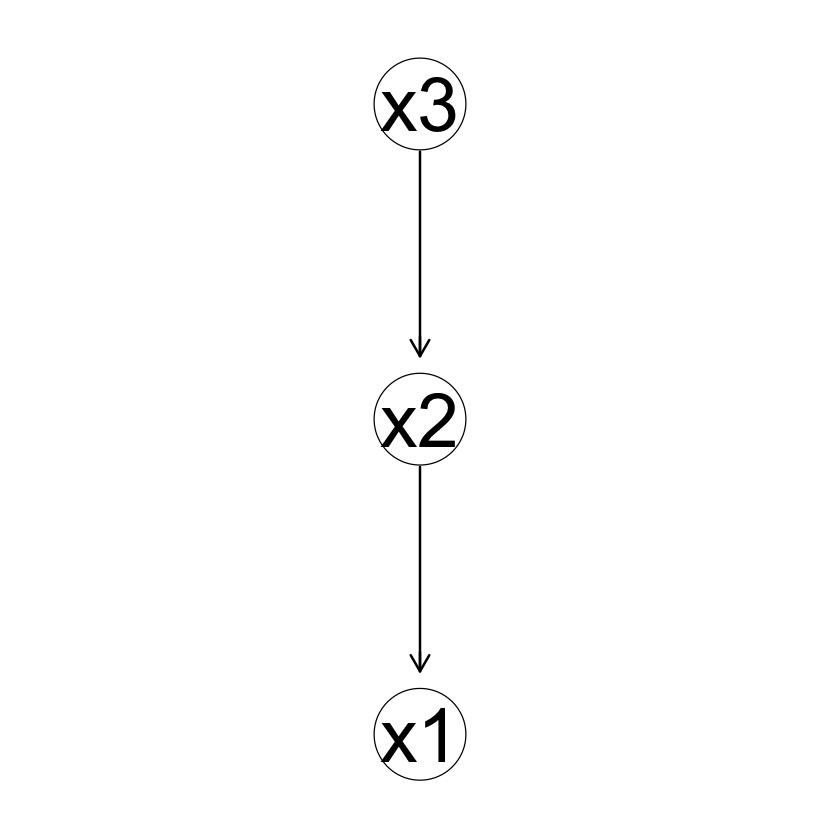

In [10]:
######## RUIZ ########
plot(ruiz.bns, main = "Ruiz DAG (MMHC)"); 

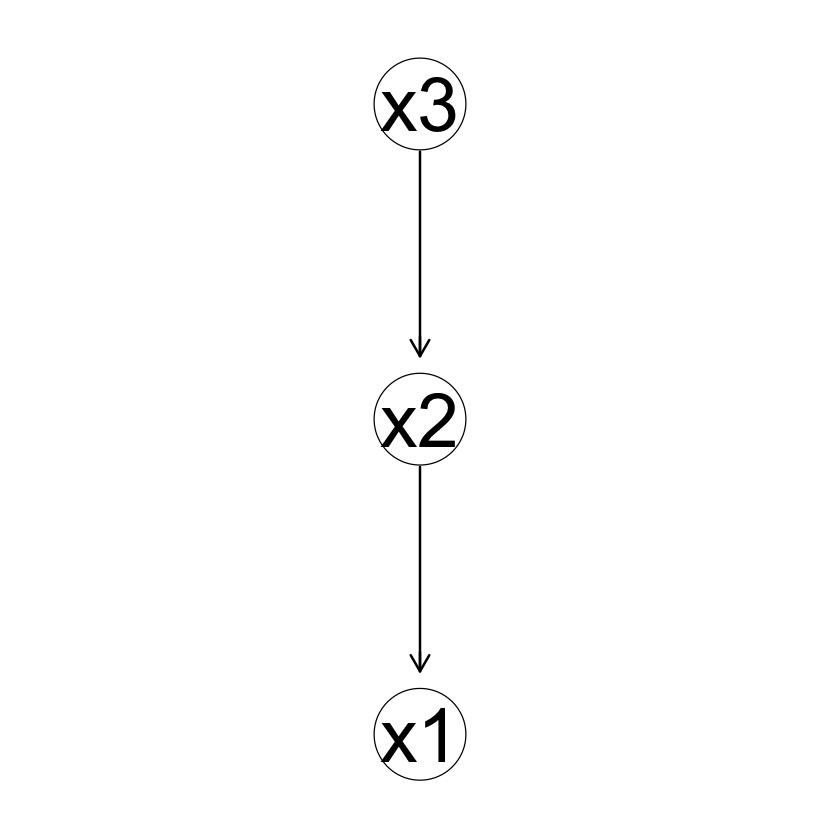

In [11]:
plot(ruiz.bns.no.order, main = "Ruiz DAG (MMHC)"); 

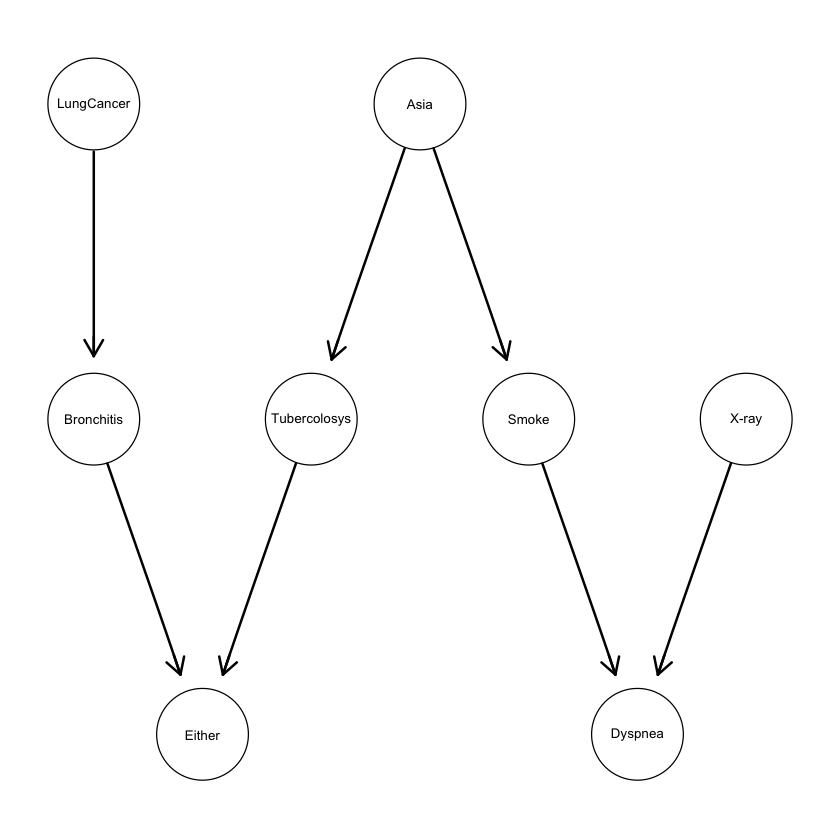

In [12]:
######## ASIA ########
plot(asia.net.bs, main = "Asia DAG (MMHC)")

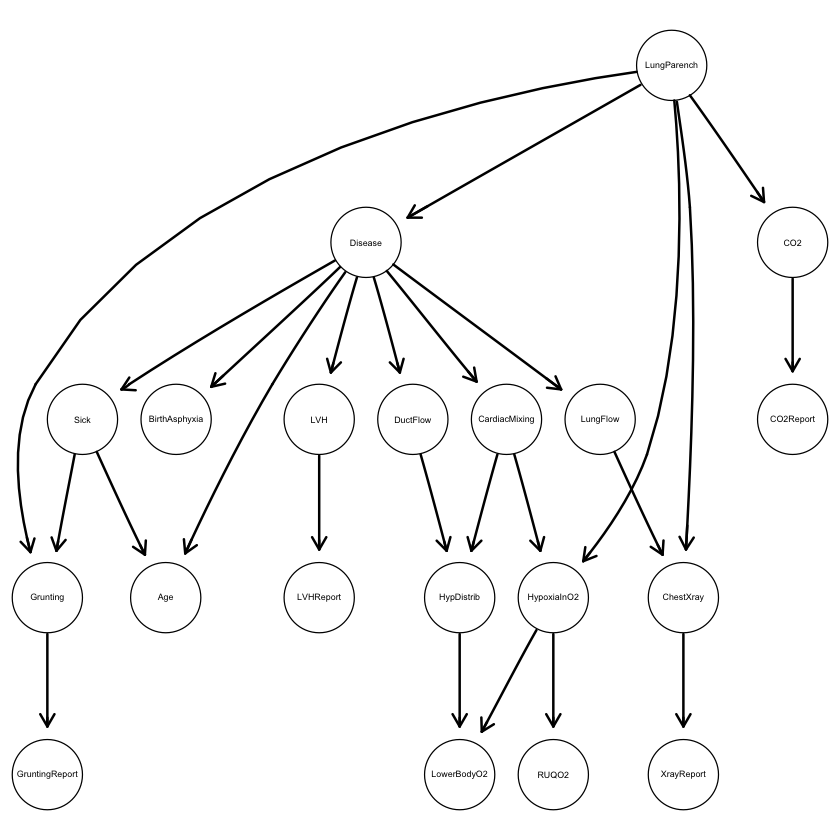

In [13]:
####### CHILD #########
plot(child.bns, main = "Child DAG (MMHC)")

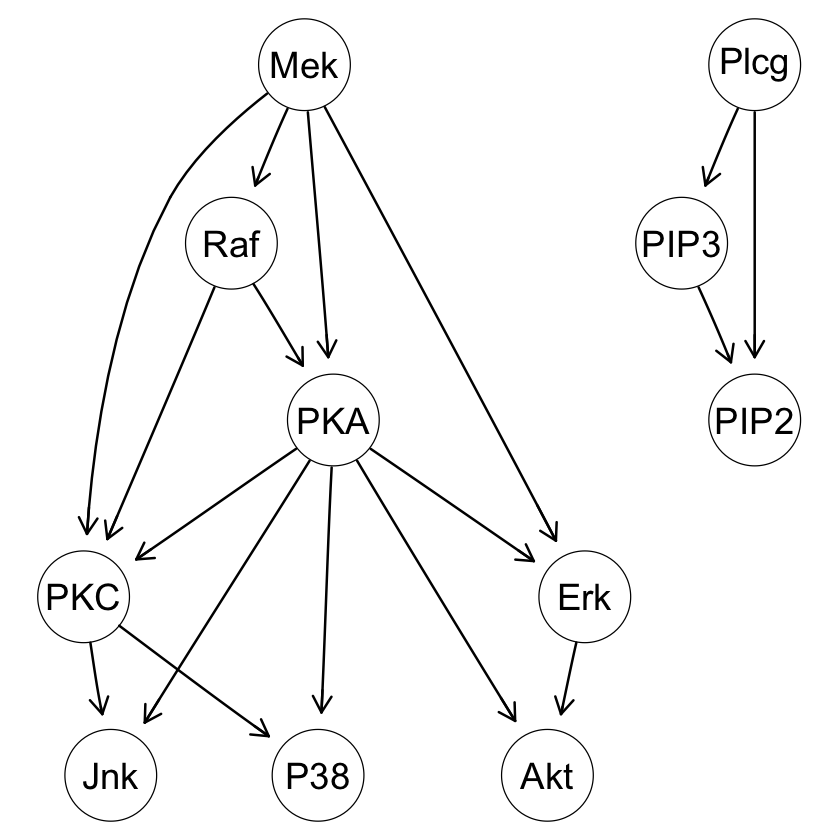

In [14]:
####### SACHS #########
plot(sachs.bns, main = "Sachs DAG (MMHC)")